In [2]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipympl
from mpl_toolkits.mplot3d import Axes3D
import squarify
import category_encoders as ce
import networkx as nx
# Force widgets to be shown on notebook (may need permissions from the user)
%matplotlib widget
#%matplotlib inline

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [5]:
data = pd.read_excel(r'C:\Users\user\Exports\MergedData.xlsx', sheet_name='Reviews')
data 

,Local ID,Extraction Date,Global Rating,Position On Ranking,Sites On Ranking,Total Reviews,User Name,User Location,User Contributions,Trip Type,Review Written,Review Visited,Review Rating,Review Language,Review Full Text,User ISO,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",US,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,IE,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,ES,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,NaN,ES
4,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,NaN,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...,US,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67732,MAG100,2021-08-21 16:27:11.518,4.5,11,677,5179,Diego B@diegobX5676JH,"Buenos Aires, Argentina",86,Couples,2019-04-23,2019-04-01,5,en,Florence is my favorite Italian city so far.Th...,AR,IT
67733,MAG100,2021-08-21 16:27:11.614,4.5,11,677,5179,rosa.ji@rosaji,NaN,14,Friends,2019-04-23,2019-03-01,5,en,"I don't even want to review this city, because...",NaN,IT
67734,MAG100,2021-08-21 16:27:11.705,4.5,11,677,5179,Margrieta K@Margrieta2013,"Elburg, The Netherlands",403,Business,2019-03-24,2019-03-01,5,en,The old centre of Florence is realy worth the ...,NL,IT
67735,MAG100,2021-08-21 16:27:12.086,4.5,11,677,5179,KateJourney@KateJourney,"Exeter, Canada",185,NaN,2019-02-12,2018-11-01,4,en,It is an ironic twist to see all of the modern...,CA,IT


In [6]:
# Create a pivot table
pt = pd.pivot_table(data[['User Name','Local ID']],
                    index='User Name',                                  # Each row will represent a traveler (trip)
                    columns='Local ID',                                 # Each attraction will be a column (tourist site)
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)   # The value should be 1 if the attraction is present in the trip, otherwise 0
pt.head()

Local ID,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,MAG010,...,MAG091,MAG092,MAG093,MAG094,MAG095,MAG096,MAG097,MAG098,MAG099,MAG100
User Name,,,,,,,,,,,,,,,,,,,,,
#1 Best@Number1Best,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Travelendlessbeauty@travelendlessbeauty,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#moving mountains@peaceat28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#taxi de Barcelona #taxi#aeropuer@cavataxi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Tis Me@DrSuess2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Converting DataFrame pt columns to boolean data type
pt = pt.astype(bool)

# Perform association rule mining
frequent_itemsets = apriori(pt, min_support=0.0001, use_colnames=True)

In [8]:
# Generate the association rules - by support
rulesSupport = association_rules(frequent_itemsets, metric="support", min_threshold=0.0001)
rulesSupport.sort_values(by='support', ascending=False, inplace=True)
rulesSupport.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(MAG001),(MAG002),0.126189,0.041395,0.021887,0.173445,4.189947,0.016663,1.159759,0.871279
1,(MAG002),(MAG001),0.041395,0.126189,0.021887,0.528726,4.189947,0.016663,1.854145,0.794210
4,(MAG004),(MAG001),0.025535,0.126189,0.011605,0.454482,3.601593,0.008383,1.601800,0.741273
5,(MAG001),(MAG004),0.126189,0.025535,0.011605,0.091965,3.601593,0.008383,1.073159,0.826661
430,(MAG012),(MAG019),0.026983,0.016111,0.007689,0.284957,17.686938,0.007254,1.375985,0.969625
431,(MAG019),(MAG012),0.016111,0.026983,0.007689,0.477248,17.686938,0.007254,1.861334,0.958910
39,(MAG001),(MAG023),0.126189,0.012267,0.006884,0.054556,4.447487,0.005336,1.044729,0.887096
38,(MAG023),(MAG001),0.012267,0.126189,0.006884,0.561224,4.447487,0.005336,1.991476,0.784781
290,(MAG037),(MAG006),0.017095,0.070399,0.005919,0.346234,4.918163,0.004715,1.421918,0.810528
291,(MAG006),(MAG037),0.070399,0.017095,0.005919,0.084074,4.918163,0.004715,1.073128,0.857004


In the code block above, the most relevant association rules are displayed as top 10 in the output. These metrics help to identify interesting and useful rules of association in the context of the tourist attractions that are represented in the DataFrame.
For the sake of clarity, the tourist attractions that are represented in this analysis are: Basilica of the Sagrada Familia (MAG001), Parc Guell (MAG002), Casa Batllo (MAG004), Edinburgh Castle (MAG006), Real Alcazar de Sevilla (MAG012), Catedral de Sevilla (MAG019), Casa Milà - La Pedrera (MAG023), and Edinburgh Old Town (MAG037).

These metrics do not directly represent the probability of a tourist visiting tourist attractions, but rather information about the strength and nature of the association between the items (tourist attractions) in the dataset. Here is a brief explanation of the meaning of some of the metrics: 
* SUPPORT: Support represents the percentage of transactions (or records) in the data set that contain both the antecedent and consequent of the rule. For example, if support is 0.021887, this means that approximately 2.19% of transactions (or records) contain both elements (antecedent and consequent) of the rule.
* CONFIDENCE: Confidence measures the conditional probability of the consequent occurring given the antecedent. For example, if the confidence is 0.173445, this means that approximately 17.34% of the time that the antecedent occurs, the consequent will also occur.
* LIFT: Lift is a metric that compares the probability of the consequent occurring given the antecedent to the probability of the consequent occurring in general (without considering the antecedent). A lift greater than 1 indicates that the presence of the antecedent increases the probability of the consequent, while a lift less than 1 indicates a negative association. A lift of 4.189947 indicates a substantial increase in the probability of the consequent occurring when the antecedent is present.

In [9]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.20)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
109,"(MAG023, MAG014)",(MAG001),0.000143,0.126189,0.000143,1.0,7.924614,0.000125,inf,0.873936
473,"(MAG012, MAG002, MAG030)",(MAG004),0.000107,0.025535,0.000107,1.0,39.162465,0.000105,inf,0.974570
511,"(MAG072, MAG043, MAG006)",(MAG024),0.000143,0.033081,0.000143,1.0,30.229189,0.000138,inf,0.967058
502,"(MAG023, MAG012, MAG030)",(MAG004),0.000107,0.025535,0.000107,1.0,39.162465,0.000105,inf,0.974570
483,"(MAG072, MAG003, MAG043)",(MAG024),0.000107,0.033081,0.000107,1.0,30.229189,0.000104,inf,0.967023
367,"(MAG014, MAG004, MAG002)",(MAG001),0.000107,0.126189,0.000107,1.0,7.924614,0.000094,inf,0.873905
496,"(MAG004, MAG030, MAG019)",(MAG012),0.000107,0.026983,0.000107,1.0,37.060305,0.000104,inf,0.973121
157,"(MAG018, MAG022)",(MAG003),0.000161,0.073028,0.000161,1.0,13.693438,0.000149,inf,0.927122
188,"(MAG054, MAG005)",(MAG007),0.000143,0.034368,0.000143,1.0,29.096774,0.000138,inf,0.965770
75,"(MAG002, MAG043)",(MAG001),0.000107,0.126189,0.000107,1.0,7.924614,0.000094,inf,0.873905


The code above generates association rules based on the trust metric and then classifies those rules based on Confidence. For example, the first row of the table shows a specific association rule where the antecedent is the set of items MAG012, MAG023, MAG030 (Real Alcazar de Sevilla, Casa Milà - La Pedrera, and Palace of Catalan Music respectively) and the consequent is MAG004 (Casa Batllo). This rule has a confidence of 1.0, which means that the consequent always occurs when the antecedent is present. The lift is 39.162465, indicating a strong association between the antecedent and the consequent.

The attractions appearing in this analysis are: Basilica of the Sagrada Familia (MAG001), Parc Guell (MAG002), Tower of London (MAG003), Casa Batlo (MAG004), Staromestske namesti (MAG005), Edinburgh Castle (MAG006), Schönbrunn Palace (MAG007), Real Alcazar de Sevilla (MAG012), Mosteiro dos Jeronimos (MAG014), Palace of Versailles (MAG018), Catedral de Sevilla (MAG019), Westminster Abbey (MAG022), Casa Milà - La Pedrera (MAG023), The Roman Baths (MAG024), Palace of Catalan Music (MAG030), Stonehenge (MAG043), Schönbrunn Gardens (MAG054), and Bath Abbey (MAG072).

We would like to draw your attention to the second row, where Mosteiro dos Jerónimos, together with Parc Guell and Casa Batlo, appear as antecedent of the Basilica of the Sagrada Familia. 
Remember that the level of Confidence for this association is 1.0, and therefore the people who visited this very popular tourist destination in this dataset certainly visited Mosteiro dos Jerónimos.

In [10]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1619,"(MAG012, MAG030)","(MAG004, MAG019)",0.000250,0.000340,0.000107,0.428571,1261.443609,0.000107,1.749405,0.999457
1622,"(MAG004, MAG019)","(MAG012, MAG030)",0.000340,0.000250,0.000107,0.315789,1261.443609,0.000107,1.461173,0.999547
1618,"(MAG012, MAG004)","(MAG030, MAG019)",0.000465,0.000197,0.000107,0.230769,1173.230769,0.000107,1.299744,0.999612
1623,"(MAG030, MAG019)","(MAG012, MAG004)",0.000197,0.000465,0.000107,0.545455,1173.230769,0.000107,2.198977,0.999344
1607,"(MAG012, MAG004)","(MAG023, MAG019)",0.000465,0.000232,0.000125,0.269231,1158.189349,0.000125,1.368103,0.999601
1606,"(MAG023, MAG019)","(MAG012, MAG004)",0.000232,0.000465,0.000125,0.538462,1158.189349,0.000125,2.165659,0.999369
1604,"(MAG023, MAG012)","(MAG004, MAG019)",0.000393,0.000340,0.000125,0.318182,936.526316,0.000125,1.466168,0.999325
1609,"(MAG004, MAG019)","(MAG023, MAG012)",0.000340,0.000393,0.000125,0.368421,936.526316,0.000125,1.582710,0.999272
1366,"(MAG014, MAG001)","(MAG002, MAG010)",0.000554,0.000250,0.000107,0.193548,773.142857,0.000107,1.239690,0.999260
1371,"(MAG002, MAG010)","(MAG014, MAG001)",0.000250,0.000554,0.000107,0.428571,773.142857,0.000107,1.749030,0.998957


The code above generates association rules based on the "Lift" metric, and then sorts those rules in descending order based on the lift value. Remember that a lift greater than 1 indicates that the presence of the antecedent increases the probability of the consequent, while a lift less than 1 indicates a negative association. For example, the first row of the table represents a specific association rule where the antecedent is the set of items Catedral de Sevilla (MAG019) and Casa Batlo (MAG004), and the consequent is Real Alcazar de Sevilla (MAG012) and Palace of Catalan Music (MAG030).
This rule has an extremely high lift value of 1261.443609, which indicates that there is a strong positive association between the antecedent and the consequent.

It should be noted that Mosteiro dos Jerónimos (MAG014) and Torre de Belém (MAG010) appear in the last two rows, accompanied by the Basilica of the Sagrada Familia (MAG001) and Parc Guell (MAG002). Both rules have a very high lift value, indicating a strong positive association between antecedents and consequents. The confidence is relatively low in both rules, meaning that the presence of the antecedents does not strongly guarantee the presence of the consequents, but there is still a strong association due to the high lift value. In summary, these rules indicate that the presence of items in the antecedent is related to the presence of items in the consequent with a high degree of association.

In [11]:
# Addition of a 'length' column, which will contain the number of elements in each item set in the 'itemsets' column.
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [12]:
# We have a look at some of the more common pairs of items that have significant support in the data.
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.01)]

,support,itemsets,length
99,0.021887,"(MAG001, MAG002)",2
101,0.011605,"(MAG004, MAG001)",2


In [13]:
from itertools import combinations

# Portuguese Tourist Attractions List
portuguese_landmarks = ['MAG010', 'MAG014', 'MAG021', 'MAG032', 'MAG047', 'MAG049', 'MAG093'] 

# List for storage of sight pairs and their supports
pair_supports = []

# Calculate support for each landmark paired
for pair in combinations(portuguese_landmarks, 2):
    # pair is a tuple with two pairs of sights
    pair_set = set(pair)
    
    # Filter association rules with a pair of landmarks
    pair_support = frequent_itemsets[
        frequent_itemsets['itemsets'].apply(lambda x: pair_set.issubset(x))]
    
    # Check to see if the pair_support DataFrame is not empty
    if not pair_support.empty:
        # Add the landmark pair and its support to the list
        pair_supports.append((pair, pair_support['support'].values[0]))

# Sort the list by support in descending order
pair_supports.sort(key=lambda x: x[1], reverse=True)

# View pairs and their support
for pair, support in pair_supports:
    print(f'Par de pontos turísticos: {pair}, Suporte: {support}')

Par de pontos turísticos: ('MAG010', 'MAG014'), Suporte: 0.0046134039053000505
Par de pontos turísticos: ('MAG032', 'MAG047'), Suporte: 0.0035047564551891853
Par de pontos turísticos: ('MAG010', 'MAG032'), Suporte: 0.0017166154066232744
Par de pontos turísticos: ('MAG014', 'MAG032'), Suporte: 0.0017166154066232744
Par de pontos turísticos: ('MAG021', 'MAG049'), Suporte: 0.0015378013017666834
Par de pontos turísticos: ('MAG010', 'MAG047'), Suporte: 0.0010550032186538874
Par de pontos turísticos: ('MAG014', 'MAG047'), Suporte: 0.000822544882340319
Par de pontos turísticos: ('MAG010', 'MAG021'), Suporte: 0.0006794935984550461
Par de pontos turísticos: ('MAG014', 'MAG021'), Suporte: 0.00046491667262713683
Par de pontos turísticos: ('MAG021', 'MAG032'), Suporte: 0.0004470352621414777
Par de pontos turísticos: ('MAG014', 'MAG049'), Suporte: 0.00032186538874186396
Par de pontos turísticos: ('MAG010', 'MAG049'), Suporte: 0.00030398397825620485
Par de pontos turísticos: ('MAG032', 'MAG049'), Su

The code above calculates all possible combinations of pairs of Portuguese landmarks, and then finds the support of each pair based on the previously calculated association rules. The pairs are then sorted in descending order by support and displayed with their respective support values.
The tourist attractions are:
* MAG010: Torre de Belém
* MAG014: Mosteiro dos Jerónimos
* MAG021: Ponte de Dom Luís I
* MAG032: Park and National Palace of Pena
* MAG047: Quinta da Regaleira
* MAG049: Cais da Ribeira
* MAG093: Bom Jesus do Monte

In [14]:
# Filter association rules based on specific confidence and lift criteria.
# These rules are considered to be strong and highly relevant based on the metrics that are specified.
rulesConfidence[(rulesConfidence['confidence'] >= 0.8) & (rulesConfidence['lift'] >= 4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
109,"(MAG023, MAG014)",(MAG001),0.000143,0.126189,0.000143,1.000000,7.924614,0.000125,inf,0.873936
473,"(MAG012, MAG002, MAG030)",(MAG004),0.000107,0.025535,0.000107,1.000000,39.162465,0.000105,inf,0.974570
511,"(MAG072, MAG043, MAG006)",(MAG024),0.000143,0.033081,0.000143,1.000000,30.229189,0.000138,inf,0.967058
502,"(MAG023, MAG012, MAG030)",(MAG004),0.000107,0.025535,0.000107,1.000000,39.162465,0.000105,inf,0.974570
483,"(MAG072, MAG003, MAG043)",(MAG024),0.000107,0.033081,0.000107,1.000000,30.229189,0.000104,inf,0.967023
367,"(MAG014, MAG004, MAG002)",(MAG001),0.000107,0.126189,0.000107,1.000000,7.924614,0.000094,inf,0.873905
496,"(MAG004, MAG030, MAG019)",(MAG012),0.000107,0.026983,0.000107,1.000000,37.060305,0.000104,inf,0.973121
157,"(MAG018, MAG022)",(MAG003),0.000161,0.073028,0.000161,1.000000,13.693438,0.000149,inf,0.927122
188,"(MAG054, MAG005)",(MAG007),0.000143,0.034368,0.000143,1.000000,29.096774,0.000138,inf,0.965770
75,"(MAG002, MAG043)",(MAG001),0.000107,0.126189,0.000107,1.000000,7.924614,0.000094,inf,0.873905


The code above filters association rules on the basis of specific confidence and lift criteria. We will analyze the lines in which Portuguese tourist attractions appear in relation to other tourist attractions:
* Row 1: This rule is similar to the previous one, but with different antecedents Mosteiro dos Jerónimos (MAG014) and Casa Milà - La Pedrera (MAG023), and also has 100% confidence in the presence of Basilica of the Sagrada Familia (MAG001).
* Row 6: This rule indicates that the presence of tourist attractions Mosteiro dos Jerónimos (MAG014), Parc Guell (MAG002), and Casa Batlo (MAG004) has 100% confidence in relation to the presence of tourist attraction Basilica of the Sagrada Familia (MAG001). The lift is greater than 1, indicating a strong positive association between these records.
* Row 21: In this rule, the antecedents Mosteiro dos Jerónimos (MAG014), Parc Guell (MAG002), Torre de Belém (MAG010) have a confidence of 85.71% that Basilica of the Sagrada Familia (MAG001) is present.
* Row 22: In this rule, the antecedents Mosteiro dos Jerónimos (MAG014), Basilica of the Sagrada Familia (MAG001), and Casa Batlo (MAG004) have a confidence of 85.71% in the presence of Parc Guell (MAG002). The confidence level is significantly high, indicating a strong association.
* Row 30: In this rule, the antecedents Basilica of the Sagrada Familia (MAG001) and Quinta da Regaleira (MAG047) have 80.00% confidence in the presence of Park and National Palace of Pena (MAG032). The confidence is extremely high, indicating a strong association between these records.

In [22]:
# Find all association rules where the set of antecedents equals the set of Basilica of the Sagrada Familia e Casa Milà - La Pedrera
rulesConfidence[rulesConfidence['antecedents']=={'MAG001','MAG023'}] 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63,"(MAG023, MAG001)",(MAG002),0.006884,0.041395,0.002879,0.418182,10.102117,0.002594,1.647602,0.907257
91,"(MAG023, MAG001)",(MAG004),0.006884,0.025535,0.002199,0.319481,12.511645,0.002024,1.431943,0.926452


The analysis revealed certain association rules between tourist attractions based on the confidence metric. When (MAG023, MAG001) are present as antecedents, Parc Guell (MAG002) is also present as a consequent with a confidence of 41.82%, indicating that these tourist attractions are often visited together. In addition, there is a 31.95% confidence that (MAG023, MAG001) is associated with Casa Batlo (MAG004). These associations are reinforced by the high lift value, which indicates stronger relationships than would be expected by chance. Positive leverage and conviction indicate a positive contribution to the observed support, and zhangs_metric confirms the quality of these association rules.

In [23]:
# Filter the association rules so that only the rules whose result contains Parc Guell are selected.
rulesConfidence[['MAG002' in elem for elem in rulesConfidence['consequents']]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
366,"(MAG014, MAG004, MAG001)",(MAG002),0.000125,0.041395,0.000107,0.857143,20.706202,0.000102,6.710232,0.951824
472,"(MAG012, MAG004, MAG030)",(MAG002),0.000143,0.041395,0.000107,0.750000,18.117927,0.000101,3.834418,0.944941
476,"(MAG023, MAG004, MAG030)",(MAG002),0.000429,0.041395,0.000268,0.625000,15.098272,0.000250,2.556279,0.934168
556,"(MAG023, MAG004, MAG001, MAG030)",(MAG002),0.000322,0.041395,0.000197,0.611111,14.762755,0.000183,2.464983,0.932562
369,"(MAG014, MAG004)","(MAG001, MAG002)",0.000179,0.021887,0.000107,0.600000,27.413725,0.000103,2.445283,0.963694
...,...,...,...,...,...,...,...,...,...,...
4,(MAG004),(MAG002),0.025535,0.041395,0.005883,0.230392,5.565638,0.004826,1.245575,0.841822
72,"(MAG001, MAG032)",(MAG002),0.000483,0.041395,0.000107,0.222222,5.368275,0.000087,1.232492,0.814113
561,"(MAG004, MAG001, MAG030)","(MAG023, MAG002)",0.000894,0.003845,0.000197,0.220000,57.224558,0.000193,1.277122,0.983404
6,(MAG030),(MAG002),0.007975,0.041395,0.001734,0.217489,5.253928,0.001404,1.225036,0.816175


It is worth noting the results in which Mosteiro dos Jerónimos (MAG014) and the Park and National Palace of Pena (MAG032) appear as antecedents of Parc Guell (MAG002). Association rule analysis provides valuable insight into the relationships between sets of landmarks (antecedents) and individual landmarks or other sets of landmarks (consequents) based on the confidence metric.
In the first instance, the antecedents (MAG014, MAG004, MAG001) have a very high confidence of 85.71%, which means that if these three landmarks are present, it is very likely (lift of 20.706202) that (MAG002) is also present. This suggests a strong association and dependency between these tourist attractions.
The second occurrence shows that (MAG014, MAG004) has a confidence of 60.00% with respect to the set (MAG001, MAG002). The extremely high lift of 27.413725 indicates an exceptionally strong association between these landmarks.
Finally, in the third occurrence, the antecedents (MAG001, MAG032) have a confidence of 22.22%, and the lift of 5.368275 indicates a stronger than randomly expected association with (MAG002). The leverage, conviction, and zhangs_metric metrics also reinforce the dependence between antecedents and consequents.
This analysis revealed interesting associations between these attractions and can be valuable for recommendation strategies and travel planning, as it shows which tourist attractions tend to be visited together with a high probability.

In [27]:
# Substitute attractions
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
59,(MAG001),(MAG035),0.126189,0.026411,0.000125,0.000992,0.037557,-0.003208,0.974556,-0.967026
58,(MAG035),(MAG001),0.026411,0.126189,0.000125,0.004739,0.037557,-0.003208,0.877972,-0.963398
29,(MAG001),(MAG017),0.126189,0.024354,0.000125,0.000992,0.040729,-0.002948,0.976614,-0.964227
28,(MAG017),(MAG001),0.024354,0.126189,0.000125,0.005140,0.040729,-0.002948,0.878325,-0.960224
41,(MAG001),(MAG024),0.126189,0.033081,0.000179,0.001417,0.042836,-0.003996,0.968291,-0.962366
40,(MAG024),(MAG001),0.033081,0.126189,0.000179,0.005405,0.042836,-0.003996,0.878560,-0.958523
6,(MAG001),(MAG006),0.126189,0.070399,0.000411,0.003259,0.046296,-0.008472,0.932641,-0.959309
7,(MAG006),(MAG001),0.070399,0.126189,0.000411,0.005842,0.046296,-0.008472,0.878946,-0.956823
266,(MAG011),(MAG006),0.034547,0.070399,0.000125,0.003623,0.051466,-0.002307,0.932981,-0.950223
267,(MAG006),(MAG011),0.070399,0.034547,0.000125,0.001778,0.051466,-0.002307,0.967173,-0.951983


Lift is a metric commonly used in association rule mining to evaluate how much the occurrence of one set of elements (antecedents) influences the occurrence of another set of elements (consequents) compared to the expected occurrence at random. Therefore, the code above generates a list of association rules based on lift and sorts them in order of increasing lift so that it is possible to analyze the weakest or least significant associations in the data set.

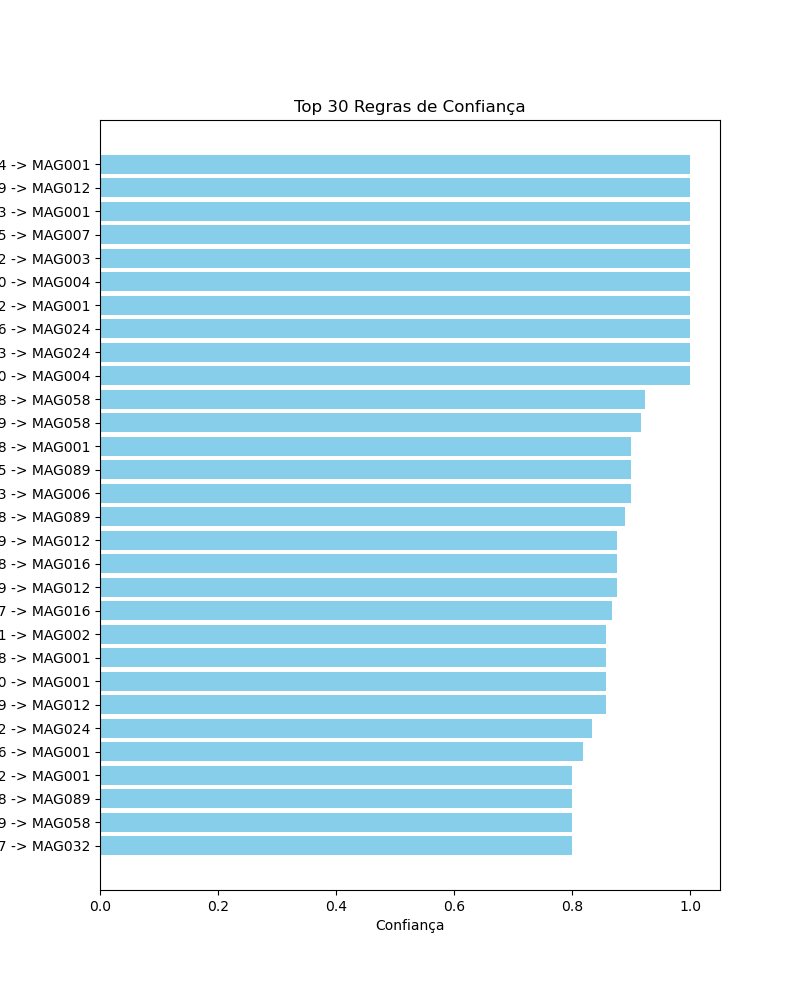

In [33]:
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]

# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)

# Creation of a clear text representation of each association rule
rulesToPlot['rule'] = rulesToPlot['LHS'] + ' -> ' + rulesToPlot['RHS']

# Sort rules by confidence for better visualization
sorted_rules = rulesToPlot.sort_values('confidence', ascending=False)

# Creation of bar chart
plt.figure(figsize=(8, 10))
plt.barh(sorted_rules['rule'][:30], sorted_rules['confidence'][:30], color='skyblue')
plt.xlabel('Confiança')
plt.ylabel('Regras')
plt.title('Top 30 Regras de Confiança')
plt.gca().invert_yaxis()  # Invert the Y-axis to show the highest confidence at the top
plt.show()

In [35]:
import datetime
print(datetime.datetime.now())

2023-12-29 23:07:41.699251
